In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import tweepy as tw
import json 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing file 
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_predict = pd.read_csv('image-predictions.tsv', sep='\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Coverting timestamp to DateTime we can extract data from it
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'])

#Extract new columns (year, month and day)
df_twitter['day'] = df_twitter['timestamp'].dt.day
df_twitter['month'] = df_twitter['timestamp'].dt.month
df_twitter['year'] = df_twitter['timestamp'].dt.year

#Dropping TimeStamp column 
df_twitter = df_twitter.drop('timestamp', 1)

In [7]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1,8,2017
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1,8,2017
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,31,7,2017
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,30,7,2017
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,29,7,2017


In [8]:
#Authentication: To begin the process we need to register our client application with Twitter.
auth = tw.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tw.API(auth, 
                 parser = tw.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [10]:
tweets = []
not_found_tweets = [] # Tweets that can't be found are saved in the list below:
for tweet_id in df_twitter['tweet_id']:   
    try:
        tweets.append(api.get_status(tweet_id)) #Returns a single status specified by the tweeet ID parameter.

    except Exception as e:
        not_found_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 466
Rate limit reached. Sleeping for: 452


In [16]:
print("The number of tweets found: " ,len(tweets))
print("The number of tweets not found: " , len(not_found_tweets))

The number of tweets found:  2331
The number of tweets not found:  25


In [17]:
tweets_dict = [] #Creatign a dictionary that contains every tweet full description
for i in tweets: # i represents json tweet per iteration
    tweets_dict.append(i)

with open('tweet_json.txt', 'w') as file: #open file with write mode
        file.write(json.dumps(tweets_dict, indent=4)) #pretty printed 

In [20]:
#Convert Json dictionary to Json DataFrame
df_json1 = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for dictionary in all_data: #Setting variable for each column value
        tweet_id = dictionary['id']
        tweet = dictionary['text']
        source = dictionary['source']
        only_url = tweet[tweet.find('https'):]
        favorite_count = dictionary['favorite_count']
        retweet_count = dictionary['retweet_count']
        followers_count = dictionary['user']['followers_count']
        friends_count = dictionary['user']['friends_count']
        
        retweeted_status = dictionary['retweeted_status'] = dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        df_json1.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'retweeted_status': retweeted_status,
                            })
        df_json = pd.DataFrame(df_json1, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count', 
                                                           'retweeted_status', 'url'])


In [21]:
df_json.head()
#So, now we have df_twitter, df_predict and df_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
0,892420643555336193,35922,7627,8799606,17,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30993,5645,8799606,17,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23316,3739,8799606,17,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39204,7796,8799606,17,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37450,8393,8799606,17,Original tweet,https://t.co/0g0KMIVXZ3


In [22]:
#ASSESSING DATA
df_json.info

<bound method DataFrame.info of                 tweet_id  favorite_count  retweet_count  followers_count  \
0     892420643555336193           35922           7627          8799606   
1     892177421306343426           30993           5645          8799606   
2     891815181378084864           23316           3739          8799606   
3     891689557279858688           39204           7796          8799606   
4     891327558926688256           37450           8393          8799606   
...                  ...             ...            ...              ...   
2326  666049248165822465              96             40          8799660   
2327  666044226329800704             269            130          8799660   
2328  666033412701032449             111             41          8799660   
2329  666029285002620928             120             42          8799660   
2330  666020888022790149            2394            459          8799660   

      friends_count retweeted_status                   

In [24]:
df_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7502.791935,2677.409695,8.799637e+06,17.0
std,11646.179979,4527.249074,6.529843e+01,0.0
min,0.000000,1.000000,8.799606e+06,17.0
25%,1305.500000,542.000000,8.799615e+06,17.0
50%,3262.000000,1254.000000,8.799632e+06,17.0
75%,9190.000000,3113.000000,8.799635e+06,17.0
max,154898.000000,76963.000000,8.800305e+06,17.0


In [27]:
#CHECK FOR DUPLICATES 
df_twitter['tweet_id'].duplicated().sum(), df_predict['tweet_id'].duplicated().sum()

(0, 0)

In [28]:
#CHECK FOR NULLS 
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
day                              0
month                            0
year                             0
dtype: int64

In [29]:
df_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
df_twitter[df_twitter['rating_numerator'] > 30] #Making a segment 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
188,855862651834028034,8.558616e+17,1.943518e+08,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,22,4,2017
189,855860136149123072,8.558585e+17,1.361572e+07,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None,22,4,2017
290,838150277551247360,8.381455e+17,2.195506e+07,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None,4,3,2017
313,835246439529840640,8.352460e+17,2.625958e+07,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,24,2,2017
340,832215909146226688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,16,2,2017
433,820690176645140481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,15,1,2017
695,786709082849828864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,13,10,2016
902,758467244762497024,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,28,7,2016
979,749981277374128128,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,4,7,2016
1120,731156023742988288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,13,5,2016


In [36]:
df_twitter[df_twitter['rating_denominator'] > 10] #Making a segment 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
342,832088576586297345,8.320875e+17,3.058208e+07,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,16,2,2017
433,820690176645140481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,15,1,2017
784,775096608509886464,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,11,9,2016
902,758467244762497024,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,28,7,2016
1068,740373189193256964,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,8,6,2016
1120,731156023742988288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,13,5,2016
1165,722974582966214656,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None,21,4,2016
1202,716439118184652801,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,3,4,2016
1228,713900603437621249,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None,27,3,2016
1254,710658690886586372,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None,18,3,2016


In [38]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
day                           2356 non-null int64
month                         235

In [39]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,day,month,year
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,15.964346,6.999151,2015.912139
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,8.888816,4.098987,0.700262
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,8.000000,3.000000,2015.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,16.000000,7.000000,2016.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,24.000000,11.000000,2016.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,31.000000,12.000000,2017.000000


In [40]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [342]:
## CLEANING DATA
##
##
##
df_twitter_clean = df_twitter.copy()
df_predict_clean = df_predict.copy()
df_json_clean = df_json.copy()

In [343]:
list(df_twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'day',
 'month',
 'year']

In [344]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [345]:
df_twitter_clean.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [346]:
df_twitter_clean.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [347]:
#Delete un-used columns 
df_twitter_clean = df_twitter_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)
list(df_twitter_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'day',
 'month',
 'year']

In [348]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
day                   2356 non-null int64
month                 2356 non-null int64
year                  2356 non-null int64
dtypes: int64(6), object(6)
memory usage: 221.0+ KB


In [349]:
df_twitter_clean.pupper.value_counts(),df_twitter_clean.puppo.value_counts(),df_twitter_clean.floofer.value_counts()

(None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64)

In [350]:
df_twitter_clean['tweet_id'].duplicated().sum() #Need to remove duplicated tweets

0

In [351]:
# Keeping one tweet that represents all duplicates 
df_twitter_clean = df_twitter_clean.drop_duplicates(subset='tweet_id', keep='last')
df_twitter_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1,8,2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1,8,2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,31,7,2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,30,7,2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,29,7,2017


In [352]:
#Gathering and Melting dogs type into one column 
df_twitter_clean = pd.melt(df_twitter_clean, 
                           id_vars=['tweet_id','text','rating_numerator','rating_denominator','name', 'day','month', 'year'],
                           var_name='dogs', value_name='dogs_stage')

In [353]:
df_twitter_clean = df_twitter_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
df_twitter_clean = df_twitter_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
df_twitter_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dogs_stage
3772,698635131305795584,Here we are witnessing five Guatemalan Birch F...,12,10,None,13,2,2016,None
3316,751205363882532864,"""This photographer took pics of her best frien...",12,10,None,8,7,2016,None
2518,860524505164394496,This is Carl. He likes to dance. Doesn't care ...,13,10,Carl,5,5,2017,None
4393,671561002136281088,This is the best thing I've ever seen so sprea...,13,10,the,1,12,2015,None
2876,810254108431155201,"This is Gus. He likes to be close to you, whic...",12,10,Gus,17,12,2016,None


In [354]:
df_twitter_clean.dogs_stage.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

In [355]:
#Making a new rating column
df_twitter_clean['rating_total'] = 10 * df_twitter_clean['rating_numerator'] / df_twitter_clean['rating_denominator'].astype(float)
df_twitter_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dogs_stage,rating_total
3607,710997087345876993,Meet Milo and Amos. They are the best of pals....,12,10,Milo,19,3,2016,None,12.0
3994,684188786104872960,"""Yo Boomer I'm taking a selfie, grab your stic...",10,10,None,5,1,2016,None,10.0
3983,684594889858887680,"""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",10,10,None,6,1,2016,None,10.0
2278,667435689202614272,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,None,19,11,2015,None,12.0
52,882045870035918850,"This is Koko. Her owner, inspired by Barney, r...",13,10,Koko,4,7,2017,None,13.0
4466,670444955656130560,This is Paull. He just stubbed his toe. 10/10 ...,10,10,Paull,28,11,2015,None,10.0
6530,676593408224403456,This pupper loves leaves. 11/10 for committed ...,11,10,None,15,12,2015,pupper,11.0
5855,727314416056803329,This pupper was about to explain where that di...,11,10,None,3,5,2016,pupper,11.0
4447,670783437142401025,Flamboyant pup here. Probably poisonous. Won't...,1,10,None,29,11,2015,None,1.0
914,757393109802180609,Here's a doggo completely oblivious to the dou...,10,10,None,25,7,2016,doggo,10.0


In [356]:
df_twitter_clean['rating_total']

2259    12.0
2260     5.0
2261     1.0
2262     9.0
2263    10.0
        ... 
7463    14.0
7465    12.0
7466    12.0
7622    12.0
7236    13.0
Name: rating_total, Length: 2356, dtype: float64

In [357]:
df_twitter_clean.duplicated().sum()

0

In [358]:
df_predict_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [359]:
df_predict_clean.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
lorikeet                1
bakery                  1
hand_blower             1
pool_table              1
slug                    1
Name: p1, Length: 378, dtype: int64

In [360]:
df_predict_clean.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [361]:
list(df_predict_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [362]:
#Delete columns that won't benefit us
df_predict_clean = df_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf'
                                          ,'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#TEST
list(df_predict_clean)

['tweet_id', 'jpg_url']

In [363]:
df_predict_clean['jpg_url'].duplicated().sum()

66

In [364]:
# Keeping one tweet that represents all duplicates 
df_predict_clean = df_predict_clean.drop_duplicates(subset='jpg_url', keep='last')

In [365]:
#Checing again
df_predict_clean['jpg_url'].duplicated().sum()

0

In [366]:
df_json_clean['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [367]:

# Gathering just ORIGINAL TWEETS OF WeRateDogs
df_json_clean = df_json_clean[df_json_clean['retweeted_status'] == 'Original tweet']
df_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [368]:
## Now we need to merge 3 dataframes together in one dataframe to make insights from it 
df_twitter_merge1 = pd.merge(df_twitter_clean, 
                      df_predict_clean, 
                      how = 'left', on = ['tweet_id'])
df_twitter_merge1.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dogs_stage,rating_total,jpg_url
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,20,11,2015,None,12.0,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,20,11,2015,None,5.0,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,20,11,2015,None,1.0,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg
3,667546741521195010,Here is George. George took a selfie of his ne...,9,10,George,20,11,2015,None,9.0,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,20,11,2015,None,10.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg


In [369]:
df_twitter_merge1['jpg_url'].isnull().sum() # Checking on nulls that may occur according to merging

347

In [370]:
df_twitter_merge1 = df_twitter_merge1[df_twitter_merge1['jpg_url'].notnull()]
df_twitter_merge1['jpg_url'].isnull().sum() # Checking again

0

In [371]:

df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2168 non-null object
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
followers_count     2168 non-null int64
friends_count       2168 non-null int64
retweeted_status    2168 non-null object
url                 2168 non-null object
dtypes: int64(4), object(3)
memory usage: 135.5+ KB


In [372]:
df_twitter_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2009 non-null int64
text                  2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
day                   2009 non-null int64
month                 2009 non-null int64
year                  2009 non-null int64
dogs_stage            2009 non-null object
rating_total          2009 non-null float64
jpg_url               2009 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 188.3+ KB


In [373]:
#Noticing that tweet_id columns are object and int64 
# So, let's try converting
df_twitter_merge1['tweet_id']=df_twitter_merge1['tweet_id'].apply(str)


In [374]:
df_twitter_merge1['rating_total']

0       12.0
1        5.0
2        1.0
3        9.0
4       10.0
        ... 
2349     9.0
2351    14.0
2353    12.0
2354    12.0
2355    13.0
Name: rating_total, Length: 2009, dtype: float64

In [375]:
#Merging json dataframe with the first merged dataframe
# On here to avid redundancy of two columns, just take the mutual tweet_id column 
df_twitter_merge2 = pd.merge(df_twitter_merge1, df_json_clean, how = 'left', on = ['tweet_id']) 


In [376]:
df_twitter_merge2.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dogs_stage,rating_total,jpg_url,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,20,11,2015,None,12.0,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,20,11,2015,None,5.0,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,20,11,2015,None,1.0,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,5492.0,2120.0,8799657.0,17.0,Original tweet,https://t.co/i9iSGNn3fx
3,667546741521195010,Here is George. George took a selfie of his ne...,9,10,George,20,11,2015,None,9.0,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,324.0,115.0,8800303.0,17.0,Original tweet,https://t.co/afRtVsoIIb
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,20,11,2015,None,10.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,817.0,493.0,8799657.0,17.0,Original tweet,https://t.co/8zcwIoiuqR


In [377]:
df_twitter_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 17 columns):
tweet_id              2009 non-null object
text                  2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
day                   2009 non-null int64
month                 2009 non-null int64
year                  2009 non-null int64
dogs_stage            2009 non-null object
rating_total          2009 non-null float64
jpg_url               2009 non-null object
favorite_count        1922 non-null float64
retweet_count         1922 non-null float64
followers_count       1922 non-null float64
friends_count         1922 non-null float64
retweeted_status      1922 non-null object
url                   1922 non-null object
dtypes: float64(5), int64(5), object(7)
memory usage: 282.5+ KB


In [378]:
df_twitter_merge2['tweet_id'].duplicated().sum() # Checking if there is any duplication again 

0

In [379]:
#Store the reuslt in CSV file as required
df_twitter_merge2.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

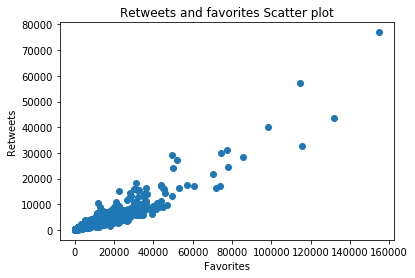

In [380]:
####################################################
#          INSIGHTS and VISUALIZATIONS             #
####################################################
#1-
plt.scatter(df_twitter_merge2['favorite_count'], df_twitter_merge2['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
# Answering on what is the relation between how people love it & share it?

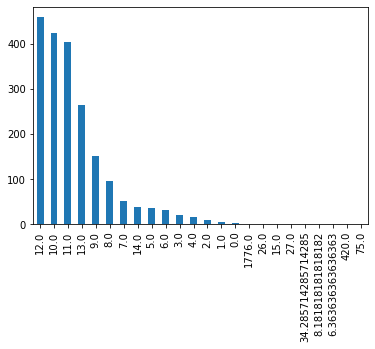

In [403]:
####################################################
#          INSIGHTS and VISUALIZATIONS             #
####################################################
#2- Number of ratings bar plot
df_twitter_merge2.rating_total.value_counts().plot(kind='bar');

In [329]:
df_twitter_merge2['dogs_stage'].value_counts()

None       1699
pupper      216
doggo        63
puppo        23
floofer       8
Name: dogs_stage, dtype: int64

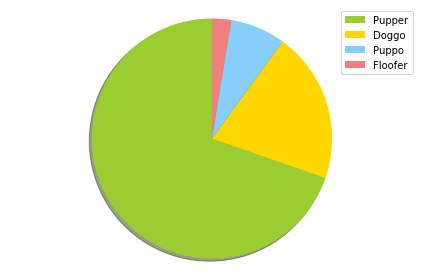

In [278]:
####################################################
#          INSIGHTS and VISUALIZATIONS             #
####################################################
#3-
import matplotlib.pyplot as plt

labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
sizes = [216,63,23,8]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

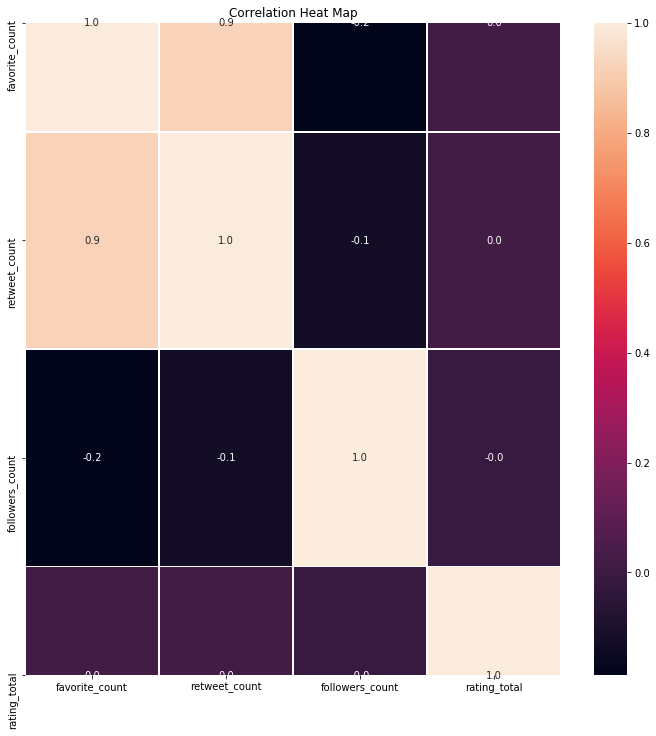

In [286]:
####################################################
#          INSIGHTS and VISUALIZATIONS             #
####################################################
#4- Correlation map
import seaborn

f,ax = plt.subplots(figsize=(12,12))
seaborn.heatmap(df_twitter_merge2[['favorite_count', 'retweet_count','followers_count',
                                           'retweeted_status', 'rating_total']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

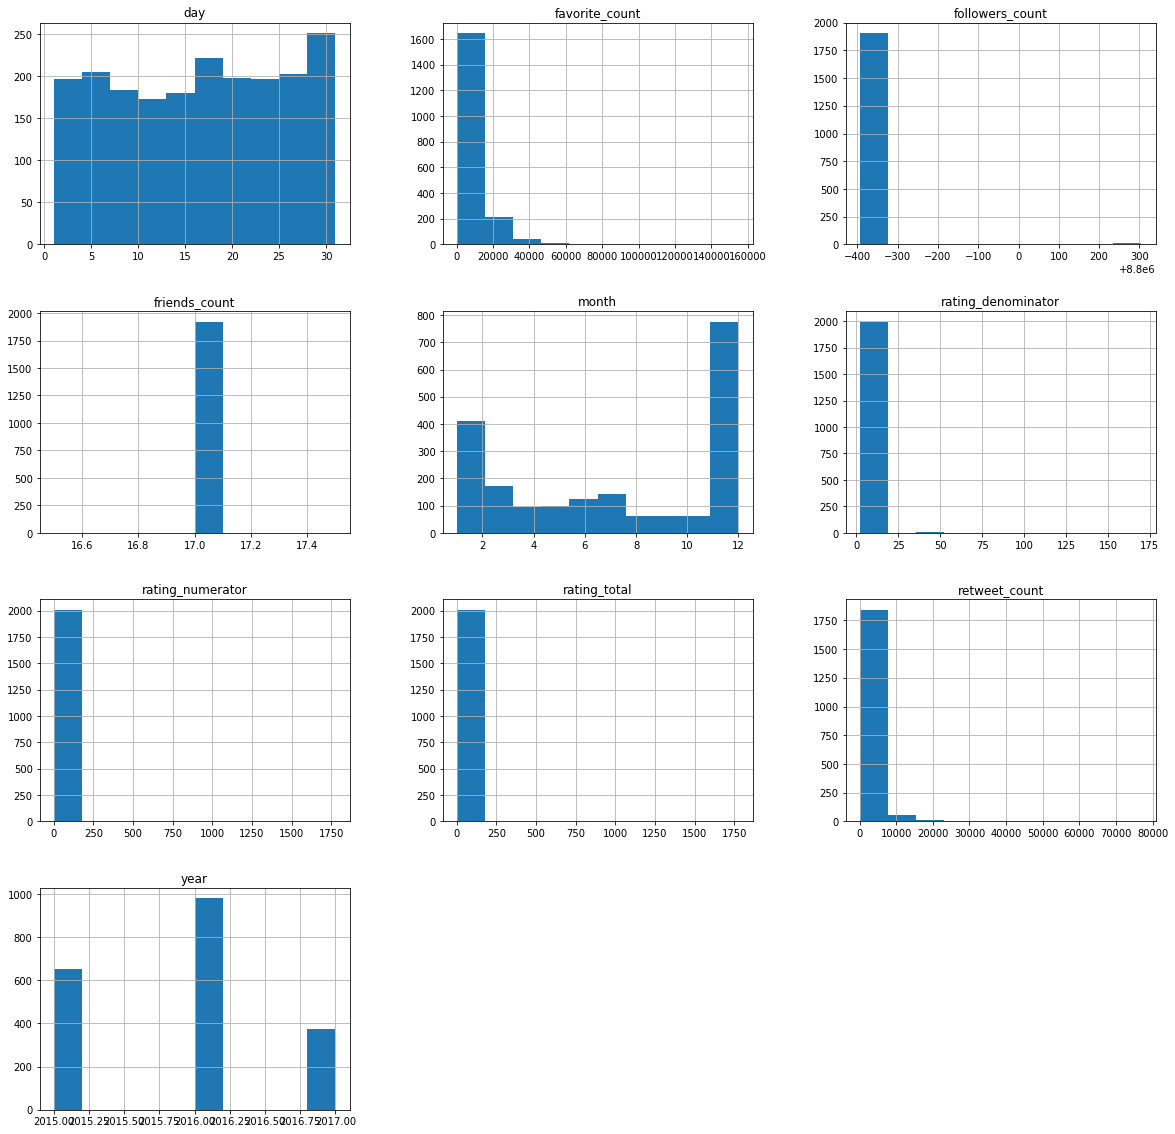

In [404]:
####################################################
#          INSIGHTS and VISUALIZATIONS             #
####################################################
#5- Histogram of all int64 columns 
df_twitter_merge2.hist(figsize=(20,20));
